# Data Preprocessing

# Objective:
Prepare the dataset for Regression to predict the final grade (G3) using relevant features.

# Actions Taken:
1. Dropped the target column `G3` from the feature set.
2. Identified categorical variables and applied one-hot encoding.
3. Preserved all numerical features.
4. Split the data into train and test sets (80/20).

# Output:
- Training Set: 519 rows
- Test Set: 130 rows
- Features after encoding: 41 columns


In [29]:
# Load the dataset

import pandas as pd

df = pd.read_csv("student-por.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [30]:
# Check dataset summary

print(f"Shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
df.info()

Shape: (649, 33)
Missing values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649

In [31]:
# Prepare features and target

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.drop("G3", axis=1)  # Features
y = df["G3"]               # Target (Final Grade)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Preprocessing: One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(drop="first"), categorical_cols)],
    remainder="passthrough"
)

# Apply transformations
X_encoded = preprocessor.fit_transform(X)

# Train-Test Split

In [32]:
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (519, 41)
X_test: (130, 41)
y_train: (519,)
y_test: (130,)


# Linear Regression Model

# Objective:
Predict the final exam score (`G3`) using linear regression based on academic and demographic features.

# Actions Taken:
1. Trained a **Linear Regression** model using the training data.
2. Made predictions on the test set.
3. Evaluated the model using:
   - **R² Score** (how well the model explains variability)
   - **Root Mean Squared Error (RMSE)** (penalizes large errors)
   - **Mean Absolute Error (MAE)** (average absolute error)

# Metrics:
We aim for **higher R²**, and **lower RMSE & MAE** to indicate better model performance.


In [33]:
# Step 2: Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print metrics
print("Linear Regression Evaluation Metrics:")
print(f"R² Score     : {r2:.4f}")
print(f"RMSE         : {rmse:.4f}")
print(f"MAE          : {mae:.4f}")


Linear Regression Evaluation Metrics:
R² Score     : 0.8487
RMSE         : 1.2149
MAE          : 0.7651


# K-Nearest Neighbors (KNN) – Classification
# Objective:
Classify whether a student is likely to pass or fail the course based on their academic and demographic features.

We define the outcome:

Pass - if G3 ≥ 10

Fail - if G3 < 10

This is stored in a new column called pass_fail

# Actions Taken:
- Created the binary classification target variable `pass_fail`
- One-hot encoded all categorical features
- Normalized numeric features using StandardScaler (since KNN is distance-based)
- Performed train-test split (80% train, 20% test)
- Trained KNN classifiers using different odd `k` values (3, 5, 7, 9, 11)
- Evaluated each model using:
  - Accuracy
  - Confusion Matrix
  - Classification Report (Precision, Recall, F1-score)

In [34]:
# Create binary target variable
df["pass_fail"] = df["G3"].apply(lambda x: "Pass" if x >= 10 else "Fail")

In [35]:
# Features and new target
X_knn = df.drop(["G3", "pass_fail"], axis=1)
y_knn = df["pass_fail"]

# Identify categorical columns
categorical_cols = X_knn.select_dtypes(include=["object"]).columns.tolist()

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor_knn = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(drop="first"), categorical_cols)],
    remainder="passthrough"
)

# Encode
X_encoded_knn = preprocessor_knn.fit_transform(X_knn)

# Normalize numeric features
scaler = StandardScaler()
X_scaled_knn = scaler.fit_transform(X_encoded_knn)

In [36]:
from sklearn.model_selection import train_test_split

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_scaled_knn, y_knn, test_size=0.2, random_state=42
)

In [37]:
# Try different k values (odd numbers)
for k in range(3, 12, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    y_pred_knn = knn.predict(X_test_knn)

    print(f"\nK = {k}")
    print("Accuracy       :", accuracy_score(y_test_knn, y_pred_knn))
    print("Confusion Matrix:\n", confusion_matrix(y_test_knn, y_pred_knn))
    print("Classification Report:\n", classification_report(y_test_knn, y_pred_knn))


K = 3
Accuracy       : 0.8846153846153846
Confusion Matrix:
 [[  4  11]
 [  4 111]]
Classification Report:
               precision    recall  f1-score   support

        Fail       0.50      0.27      0.35        15
        Pass       0.91      0.97      0.94       115

    accuracy                           0.88       130
   macro avg       0.70      0.62      0.64       130
weighted avg       0.86      0.88      0.87       130


K = 5
Accuracy       : 0.9
Confusion Matrix:
 [[  3  12]
 [  1 114]]
Classification Report:
               precision    recall  f1-score   support

        Fail       0.75      0.20      0.32        15
        Pass       0.90      0.99      0.95       115

    accuracy                           0.90       130
   macro avg       0.83      0.60      0.63       130
weighted avg       0.89      0.90      0.87       130


K = 7
Accuracy       : 0.8846153846153846
Confusion Matrix:
 [[  2  13]
 [  2 113]]
Classification Report:
               precision    recall 

# Best Model:

K = 11 gave the highest accuracy (91.54%)

It had the best balance between classes

F1-score for Fail: 0.42 (better than others)

F1-score for Pass: 0.95

# Conclusion:

The KNN model with k = 11 performed the best, especially in handling the imbalanced classes. While all models had strong performance for "Pass," k = 11 showed relatively better sensitivity toward predicting "Fail" as well.



# Naïve Bayes – Classifying Alcohol Consumption

---

# Objective:
Use the **Naïve Bayes classifier** to predict whether a student has **High** or **Low** alcohol consumption, based on their personal, social, and academic features.

We create a **binary target variable** using:
- `Dalc` (weekday alcohol consumption)
- `Walc` (weekend alcohol consumption)

---

# Target Variable:
We define the new label `alcohol_level`:
- **High** → if average of `Dalc` and `Walc` ≥ 3
- **Low** → if average < 3

This approach helps us represent overall alcohol usage.

---

# Evaluation Metrics:
Since class imbalance may be present (more "Low" than "High"), we focus on:
- **Precision**: How many predicted "High" values were actually correct?
- **Recall**: How many actual "High" values were caught?
- **F1-score**: Balanced harmonic mean of precision and recall

---

# Goal:
Build a **simple and interpretable** classifier that detects risky behavior (high alcohol consumption) based on student profiles.

---


In [38]:
# Create binary target variable based on Dalc and Walc
df["alcohol_level"] = df[["Dalc", "Walc"]].mean(axis=1).apply(lambda x: "High" if x >= 3 else "Low")


In [39]:
# Drop original Dalc and Walc to avoid data leakage
X_nb = df.drop(["Dalc", "Walc", "alcohol_level", "G3", "pass_fail"], axis=1, errors='ignore')
y_nb = df["alcohol_level"]

In [40]:
# Identify categorical columns
categorical_cols_nb = X_nb.select_dtypes(include=["object"]).columns.tolist()

# One-hot encode categorical columns
preprocessor_nb = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(drop="first"), categorical_cols_nb)],
    remainder="passthrough"
)

# Transform features
X_encoded_nb = preprocessor_nb.fit_transform(X_nb)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_encoded_nb, y_nb, test_size=0.2, random_state=42
)

# Train model
nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)

# Predict
y_pred_nb = nb_model.predict(X_test_nb)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_nb, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test_nb, y_pred_nb))


Confusion Matrix:
 [[ 11   7]
 [ 12 100]]

Classification Report:
               precision    recall  f1-score   support

        High       0.48      0.61      0.54        18
         Low       0.93      0.89      0.91       112

    accuracy                           0.85       130
   macro avg       0.71      0.75      0.72       130
weighted avg       0.87      0.85      0.86       130



# Actions Taken:

Preprocessed the features (including encoding categorical variables).

Split the data into training and testing sets.

Trained a Gaussian Naïve Bayes classifier on the training set.

Predicted on the test set.

Evaluated performance using:

Accuracy

Confusion Matrix

Classification Report (Precision, Recall, F1-Score)

# Interpretation:

The overall accuracy is 85%, which is strong.

The model performs very well on the 'Low' class, with a high precision and recall.

The performance for the 'High' class is weaker, indicating potential class imbalance or limitations of Naïve Bayes for this dataset.

Macro and weighted averages suggest decent overall balance, but further tuning or balancing could help improve minority class performance.

Classification and Regression Trees (CART)

# Task:
Classify whether a student is at risk of dropout.

# Model:
Decision Tree Classifier.

# Steps:
1. Create target variable `dropout_risk` (1 if G3 < 10, else 0).
2. Encode categorical features.
3. Split data into training and test sets.
4. Train a Decision Tree classifier.
5. Visualize the tree.
6. Evaluate using:
   - Accuracy
   - Confusion Matrix
   - Feature Importance

Accuracy: 0.8861

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.82      0.85      0.84        27

    accuracy                           0.89        79
   macro avg       0.87      0.88      0.87        79
weighted avg       0.89      0.89      0.89        79



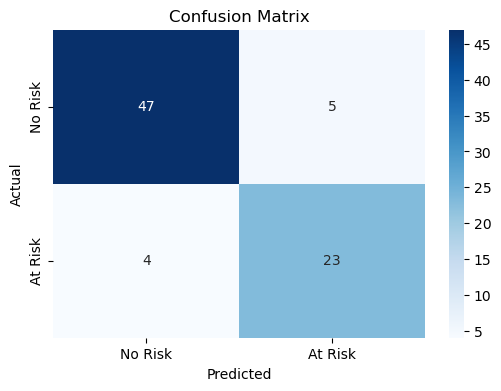


Top 10 Feature Importances:
G2             0.728231
Medu           0.067274
Fjob_other     0.041645
absences       0.027007
famsize_LE3    0.026163
goout          0.022766
G1             0.021451
health         0.019002
Mjob_other     0.012963
age            0.012024
dtype: float64


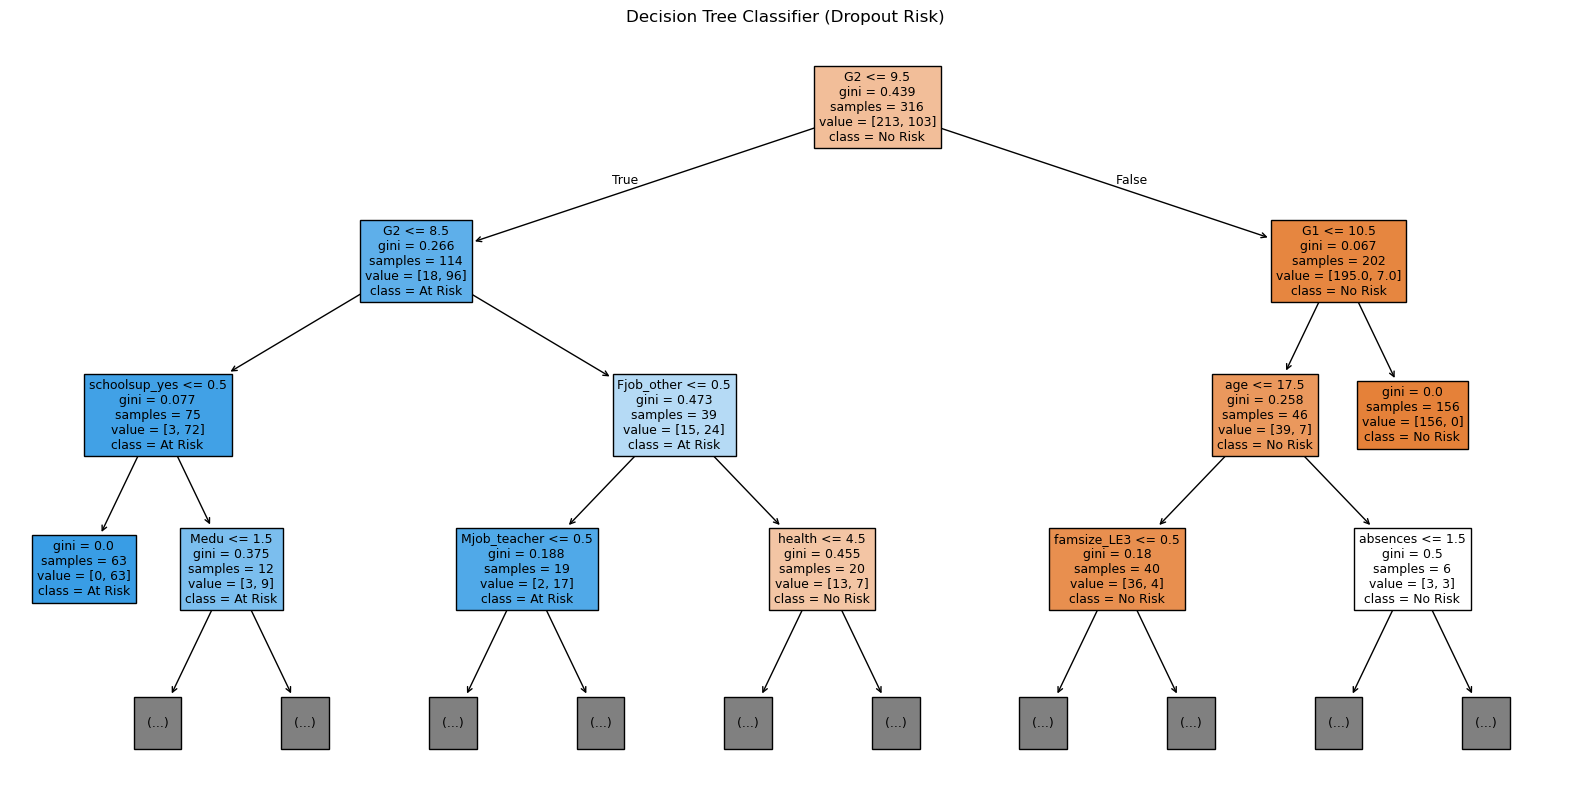

In [46]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load data
df = pd.read_csv("student-mat.csv", sep=';')

# Step 3: Create target variable (dropout risk)
df['dropout_risk'] = (df['G3'] < 10).astype(int)
df = df.drop(columns=['G3'])  # Avoid data leakage

# Step 4: Encode categorical features
df_encoded = pd.get_dummies(df.drop(columns=['dropout_risk']), drop_first=True)

# Step 5: Train-test split
X = df_encoded
y = df['dropout_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 7: Predict & Evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 8: Show accuracy & report
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Step 9: Confusion matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Risk", "At Risk"], yticklabels=["No Risk", "At Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 10: Feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns)
top_importances = importances.sort_values(ascending=False).head(10)
print("\nTop 10 Feature Importances:")
print(top_importances)

# Step 11: Visualize Decision Tree (limited depth for clarity)
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No Risk", "At Risk"], filled=True, max_depth=3)
plt.title("Decision Tree Classifier (Dropout Risk)")
plt.show()
